
## ZMUM 3

# Metody ograniczenia wariancji modelu

Poszukując modelu regresji czy klasyfikacji staramy się, by powstały estymator posiadał porządane statystycznie cechy: był zgodny, nieobciążony i najbardziej efektywny. W rzeczywistości trudno jest pogodzić dwie ostatnie własności. Przez brak obciążenia (ang. bias) rozumie się bowiem jak najlepsze dopasowanie do danych uczących. Przez największą efektywność rozumie się zwykle jak najmniejszy błąd estymacji dla zbioru testowego (każdego innego niż uczący) - najmniejszą wariancję modelu. Dla rzeczywistych zbiorów danych, na ogół, im mniejsze jest obciążenie, tym większa jest wariancja modelu i odwrotnie. Z uwagi jednak na fakt, iż celem dla którego powstaje model estymatora, jest jak najskuteczniejsze jego działanie dla nowych danych (innych niż uczące), przy tworzeniu modelu stosuje się metody, które kosztem zwiększenia obciążenia, zmniejszają wariancję modelu. W praktyce jest to osiągane przez poszukiwanie, w procesie uczenia,  modelu na tyle prostego by właściwie odwzorowywać trend, niekoniecznie idealnie dopasowującego się do danych zbioru uczącego.  

Zwiększając liczbę cech modelu oraz tworząc nowe zmienne opisujące zwiększa się zwykle jego wariancja. Widać to wyraźnie w przypadku zastosowania regresji wielomianowej. Zwiększanie stopnia wielomianu opisującego trend naszych danych zwiększane zostają współczynniki stojące przy kolejnych potęgach, co pozwala na dokładne dopasowanie modelu do danych uczących, jednak kosztem zwiększenia jego wariancji. Mimo iż obciążenie modelu z punktu widzenia danych uczących spada do zera, to tracimy jego zdolności uogólnienia (błąd estymacji wartości na podstawie zbioru testowego rośnie), co oznacza przeuczenie/nadmierne dopasowanie (ang. overfitting) naszego modelu.

Sposobem na redukcję stopnia przeuczenia/nadmiernego dopasowania modelu, a zatem ograniczenia jego wariancji, w przypadku regresji wielomianowej, są techniki regularyzacji. Generalnie mamy dwie możliwości działania:

1. Redukujemy wpływ cech nieznaczących na model tj. pozostawiamy wszystkie cechy ale w modelu realny wpływ na wyjście mają jedynie cechy znaczące - działa jeśli mamy dużo cech, z których każda skorelowana jest z wyjściem (regularyzacja Tichonowa, regresja grzbietowa - ang. ridge regression).
       
2. Redukujemy liczbę cech na jeden z trzech sposobów:

    a) selekcja manualna - używamy ważniejszych cech (w przypadku unormowanych wartości atrybutów opisujących będą to cechy, przy których wartość modułu współczynnika jest najwyższa)    
    
    b) używamy algorytmu do wyboru cech modelu (metoda zachłanna - analizujemy które cechy najlepiej minimalizują sumę kwadratu błędów)
    
    c) używamy metody regularyzacji eliminującej zbędne cechy (metoda lasso). 

Regresja grzebietowa (ang. Ridge) i Lasso to efektywne techniki zwykle stosowane do tworzenia oszczędnych modeli w obecności „dużej” liczby funkcji. Tutaj „duże” może zwykle oznaczać jedną z dwóch rzeczy:

1. Wystarczająco duży, aby zwiększyć tendencję modelu do nadmiernego dopasowania (tak niskie, jak 10 zmiennych może powodować nadmierne dopasowanie)
    
2. Wystarczająco duży, aby powodować wyzwania obliczeniowe. W przypadku nowoczesnych systemów taka sytuacja może wystąpić w przypadku milionów lub miliardów cech.

Chociaż metoda grzebietowa i Lasso mogą wydawać się bardzo do siebie  podobne, dzięki specyficznym własnościom ich praktyczne zastosowania różnią się znacznie. Działają one poprzez karanie wielkości współczynników cech oraz minimalizowanie błędu między przewidywanymi a rzeczywistymi obserwacjami. Kluczowa różnica polega na sposobie przypisywania kary do współczynników:

* Regresja grzbietowa (ridge regression, regularyzacja Tichonowa):
        Dokonuje normalizacji L2, tj. Dodaje karę równą kwadratowi wielkości współczynników
        Cel minimalizacji = RSS + α * (suma kwadratów współczynników)
* Regresja lasso:
        Dokonuje normalizacji L1, tj. Dodaje karę równoważną wartości bezwzględnej wielkości współczynników
        Cel minimalizacji = RSS + α * (suma wartości bezwzględnych współczynników)

„RSS” odnosi się do „celu najmniejszych kwadratów”, tj. Celu regresji liniowej bez regularyzacji.

**Celem tego laboratorium jest zapoznanie się z działaniem metod regularyzacji i dobru cech modelu**.


Materiały pomocnicze, lekkie (wideo) wprowadzenia do :

* [Ridge regression](https://www.youtube.com/watch?v=Q81RR3yKn30)
* [Metody lasso](https://www.youtube.com/watch?v=NGf0voTMlcs)
* [i połączenie obu (elastic net)](https://www.youtube.com/watch?v=1dKRdX9bfIo)

Na początek - wczytanie bibliotek oraz wygenerowanie zbioru danych:

In [30]:
# Wczytaj bilbioteki podstawowe
import math 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

In [31]:
# Wczytaj biblioteki potrzebne do zajęć
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

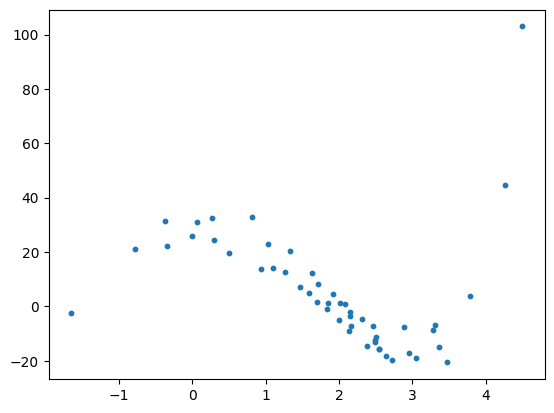

In [32]:
np.random.seed(5)
x = 2 - 3 * np.random.normal(0, 0.5, 50)
y = 30 + x - 8 * (x ** 2) - 0.5 * (x ** 3)+ 0.15 * (x ** 5)  + np.random.normal(-3, 5, 50)
plt.scatter(x,y, s=10)
plt.show()

### Zadanie 1 - regresja grzbietowa (ridge regression)

Zadanie polega na znalezieniu wielomianu $\hat{f}(x)$ postaci:

$$\hat{f}(x)=\omega_0+\omega_1 x^1+\omega_2x^2+ … +\omega_n x^n,$$

który mimo wysokiej złożoności modelu nie powoduje nadmiernego dopasowania do danych uczących poprzez zastosowanie regularyzacji L2.

Chcemy by nasza funkcja kosztu J($\omega$) miała postać:

$$J_{ridge}(\omega)=\sum_{i=1}^{m}\left(\hat{f}(x_i)−y_i\right)^2+\lambda \sum_{j=1}^n{\omega^2_j},$$

gdzie $i$ oznacza numer obserwacji, a $j$ kolejność współczynnika.

Wtedy rozwiązanie naszego równania wyzaczającego współczynniki wygląda w następujący sposób:

$$ \omega=\left(X^T X + \lambda \begin{bmatrix}
0 & 0 & 0 & 0 \\ 
0 & 1 & 0 & 0 \\ 
0 & 0 & \ddots & 0\\ 
0 & 0 & 0  & 1 \\ 
\end{bmatrix}\right) ^{-1} X^Ty $$

**Należy pamiętać, że wyrazu wolnego nie poddajemy regularyzacji !**

A zatem - do dzieła!!!

W ramach pierwszej części zadania należy napisać funkcję wyznaczającą współczynniki $\omega$ wielomianowej funkcji regresji zgodnie z powyższym wzorem.

In [33]:
# Napisz funkcję dopasowującą model regresji wielomianowej z regularyzacją L2 
# (wykorzystując rozwiązanie równania normalnego)
def create_matrix(x, degree):
    X = []
    for i in range(0, len(x)):
        row = []
        for j in range (0, degree + 1):
            row.append(pow(x[i], j))
        X.append(row)
    return X

# Wypisanie macierzy przy zachowaniu stałych szerokości kolumn
def print_matrix(X):
    for row in X:
        print("[", end="")
        for x in row:
            print(f'{round(x, 4):<10}', end='')
        print("]")

# Obliczenie wartoności współczynników dla regularyzacji
def regresja_L2(X, y, lamb, stopien_wielomianu):
    X = np.array(X)
    y = np.array(y)
    X_t = X.T
    XX_t = np.dot(X_t, X)
    l = lamb * np.identity(stopien_wielomianu + 1)
    l[0][0] = 0
    X_ty = np.dot(X_t, y)
    w = np.dot(np.linalg.inv(XX_t + l), X_ty)
    return w

Poprawne (lub nie) działanie powyższej funkcji należy sprawdzić rysując jej wykres na wykresie punktowym zbioru danych

Współczynniki: [ 2.36487200e+01  1.67550452e-01 -2.02956374e+00 -1.25917725e+00
 -1.49179385e+00 -3.58067371e-01  7.83022493e-02  6.41895678e-01
  2.99059629e-01 -7.92129993e-01  2.43469819e-01  1.60533927e-01
 -1.36174120e-01  4.01939387e-02 -5.51401917e-03  2.95099657e-04]


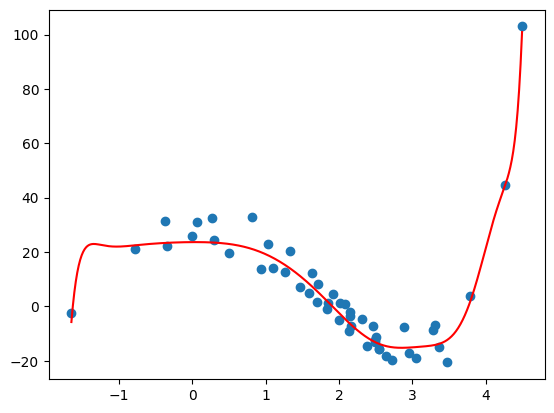

In [34]:
# get_y = f(x)
def get_y(x, parameters):
    y = []
    for x_i in x:
        y_i = 0
        for n in range(0, len(parameters)):
            y_i += parameters[n] * pow(x_i, n)
        y.append(y_i)
    return y

stopien_wielomianu = 15
lamb = 5
X = create_matrix(x, stopien_wielomianu)
w = regresja_L2(X, y, lamb, stopien_wielomianu)
print("Współczynniki: %s" % (w))

# Rysowanie wykresu
x_poly = np.arange(min(x), max(x), 0.01)
y_pred = get_y(x_poly, w)
plt.scatter(x, y)
plt.plot(x_poly, y_pred, c='red')

Podobnie jak wiele innych metod uczenia maszynowego, także i metoda regresji grzbietowej została zaimplementowana w jednym z pakietów języka Python. W kolejnym kroku nalezy znaleźć stosowną funkcję oraz porównać wyniki jej działania z własną funkcją.

In [35]:
stopien_wiel=5

Współczynniki: [ 2.58897084e+01 -7.48245437e-01 -2.04157391e+00 -1.18790865e+00
 -1.50060416e+00 -3.48644488e-01  7.21132527e-02  6.39321109e-01
  2.76812304e-01 -7.64325797e-01  2.38245272e-01  1.53650170e-01
 -1.31482542e-01  3.89247418e-02 -5.34998966e-03  2.86725915e-04]


/Users/daniel/repos/ZMUM/zmum/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.87231e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


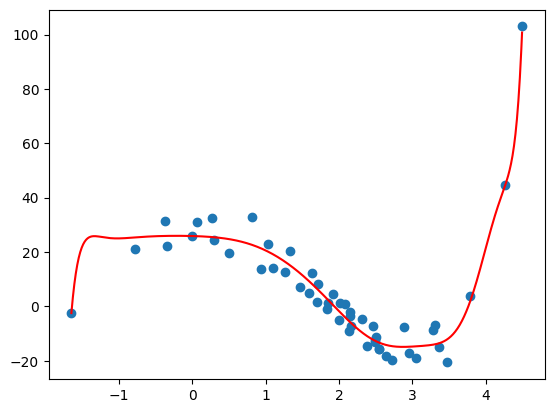

In [36]:
# miejsce na kod
from sklearn.linear_model import Ridge

clf = Ridge(alpha=5)
clf.fit(X, y)

# Pakiet zwraca osobno wyraz wolny i resztę współczynników 
w = clf.coef_
w[0] = clf.intercept_
print("Współczynniki: %s" % (w))

# Rysowanie wykresu
x_poly = np.arange(min(x), max(x), 0.01)
y_pred = get_y(x_poly, w)
plt.scatter(x, y)
plt.plot(x_poly, y_pred, c='red')

Celem wyznaczenia funkcji regresji na całym zbiorze, tak jak to miało miejsce powyżej, było praktyczne sprawdzenie jej działania. W przypadku, gdy uzyskany model estymatora miałby być zastosowany do estymacji wartości wyjściowej dla nieznanych wartości wejściowych (a zwykle tak to właśnie wygląda), oryginalny zbiór danych powinien zostać podzielony na zbiór uczący i testowy.

Współczynniki: [ 2.59855700e+01 -5.63990125e-01 -1.78855680e+00 -9.82583432e-01
 -1.49758604e+00 -5.78212827e-01 -4.82622074e-01  3.78832454e-01
  3.26946018e-01  2.90936258e-01 -3.21179272e-01 -1.23660739e-01
  1.90860531e-01 -7.10133761e-02  1.13737802e-02 -6.84646773e-04]


/Users/daniel/repos/ZMUM/zmum/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.91097e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


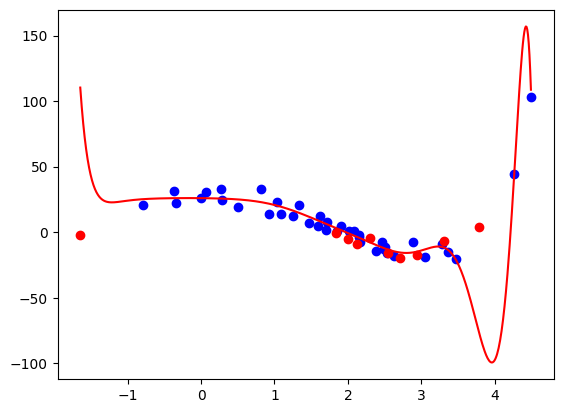

In [37]:
# Ze zbioru danych wydzielamy zbiór testowy zawierający 20% danych.
x_ucz, x_test, y_ucz, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
X = create_matrix(x_ucz, stopien_wielomianu)
clf = Ridge(alpha=5)
clf.fit(X, y_ucz)

w = clf.coef_
w[0] = clf.intercept_
print("Współczynniki: %s" % (w))

x_poly = np.arange(min(x), max(x), 0.01)
y_pred = get_y(x_poly, w)
plt.scatter(x_ucz, y_ucz, c= 'blue')
plt.scatter(x_test, y_test, c= 'red')
plt.plot(x_poly, y_pred, c='red')

Do oceny modelu w procesie uczenia stosuje się często walidację krzyżową. W omawianym przypadku wyróżnia się dwa parametry metody - stopień wielomianu funkcji regresji oraz parametr $\lambda$. Zwykle pierwszy z nich jest ustalany a-priori, zaś drugi podlega weryfikacji poprzez wykonanie walidacji krzyżowej estymatorów dla różnych jego wartości. 

Korzystając z walidacji krzyżowej (5-krotny wybór zbioru) na zbiorze treningowym napisz funkcję, która dla wielomianu stopnia 15 narysuje wykres średniego błędu uczenia i średniego błędu walidacji, jak również wykres przedstawiający wartości współczynników modelu w funkcji zmiany parametru regularyzacji $\lambda=[0, 0.01, 0.02, 0.04, 0.08, \cdots, 10]$. Można przyjąć, że $\lambda_{a+1}=24\lambda_a$. Można skorzystać z funkcji [cross_validation](https://scikit-learn.org/stable/modules/cross_validation.html) lub [Search_Grid_CV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [38]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

def get_lambdas(min=0.01, max=10):
    lambdas = [min]
    while lambdas[-1] < max:
        lambdas.append(lambdas[-1] * 2)
    return lambdas

def verify_lambda(X, y, l, folds=5):
    train_errors = []
    validation_errors = []
    models = []

    kf = KFold(n_splits=folds, shuffle=True)

    for train_index, val_index in kf.split(X, y):
        
        # Podział zbioru dla kolejnych etapów walidacji krzyżowej
        X_train, X_val = np.array(X)[train_index], np.array(X)[val_index]
        y_train, y_val = np.array(y)[train_index], np.array(y)[val_index]

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)

        model = Ridge(alpha=l)
        model.fit(X_train_scaled, y_train)
        models.append(model)

        y_train_pred = model.predict(X_train_scaled)
        y_val_pred = model.predict(X_val_scaled)

        validation_errors.append(np.sqrt(mean_squared_error(y_val, y_val_pred)))
        train_errors.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))

    best_model = models[np.argmin(validation_errors)]

    w = best_model.coef_
    intercept = best_model.intercept_

    validation_error = np.mean(validation_errors)
    train_error = np.mean(train_errors)

    print('lambda: {:<6} -> mean(train_error): {:>15} -> mean(val_error): {:>15}'.
          format(l, round(train_error, 3), round(validation_error, 3)))
    
    return validation_error, train_error, (intercept, *w)


lambda: 0.01   -> mean(train_error):           4.317 -> mean(val_error):           5.303
lambda: 0.02   -> mean(train_error):           4.311 -> mean(val_error):           5.893
lambda: 0.04   -> mean(train_error):           4.343 -> mean(val_error):           6.405
lambda: 0.08   -> mean(train_error):           4.436 -> mean(val_error):           6.619
lambda: 0.16   -> mean(train_error):            4.55 -> mean(val_error):           28.37
lambda: 0.32   -> mean(train_error):            4.85 -> mean(val_error):           7.066
lambda: 0.64   -> mean(train_error):           5.237 -> mean(val_error):           7.527
lambda: 1.28   -> mean(train_error):             5.8 -> mean(val_error):           7.424
lambda: 2.56   -> mean(train_error):            6.46 -> mean(val_error):           8.045
lambda: 5.12   -> mean(train_error):           7.094 -> mean(val_error):            15.2
lambda: 10.24  -> mean(train_error):           7.801 -> mean(val_error):           8.916


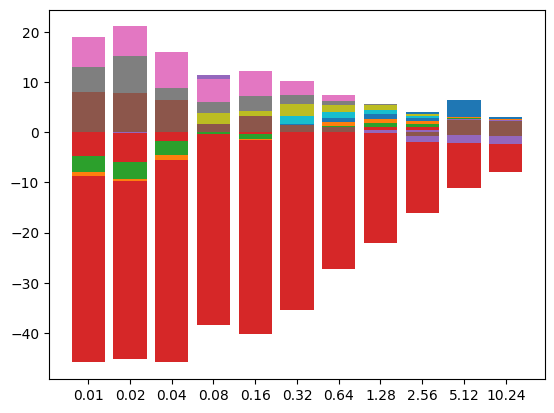

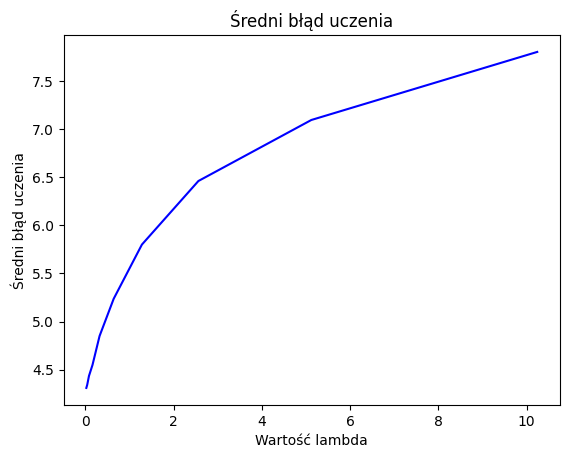

Text(0, 0.5, 'Średni błąd walidacji')

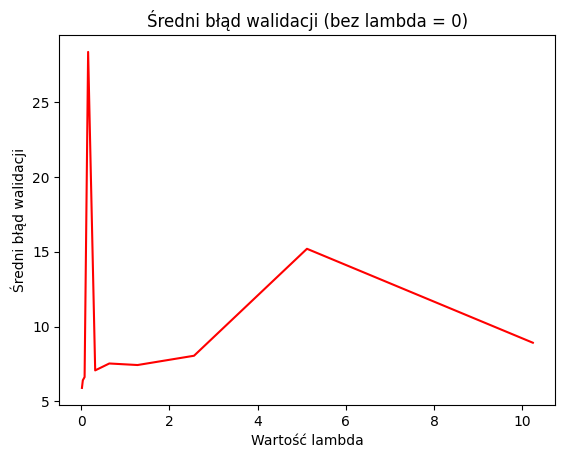

In [39]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
X = create_matrix(x, 15)
lambdas = get_lambdas()

# Obliczenie wyników dla wszystkich lambda
results = {lambda_ : verify_lambda(X, y, lambda_) for lambda_ in lambdas}

# Błędy walidacji dla różnych lambda
validation_scores = [x[0] for x in results.values()]

# Błędy uczenia dla różnych lambda
train_scores = [x[1] for x in results.values()]

# Współczynniki dla różnych lambda
coefs = [x[2] for x in results.values()]

# Wypisanie współczynników w zależności od lambda
for i in range(0, 16):
    w_i = [w[i] for w in coefs]
    plt.bar(list(map(str, lambdas)), w_i, tick_label=list(map(str, lambdas)))
plt.show()

# Wykres błędu uczenia
plt.plot(lambdas[1:], train_scores[1:], c='blue')
plt.title("Średni błąd uczenia")
plt.xlabel("Wartość lambda")
plt.ylabel("Średni błąd uczenia")
plt.show()

# Wykres błędu walidacji
plt.plot(lambdas[1:], validation_scores[1:], c='red')
plt.title("Średni błąd walidacji (bez lambda = 0)")
plt.xlabel("Wartość lambda")
plt.ylabel("Średni błąd walidacji")

**Pytania:**
1. Jak zmieniają się wartości współczynników ze zmianą współczynnika regularyzacji $\lambda$?

**Odpowiedź**

Wzrost współczynnika regularyzacji powoduje zmniejszenie się współczynników wielomianu. Jest to zgodne z przewidywaniami teoretycznymi, ponieważ dla większych współczynników funkcja kosztu powinna przyjmować większe wartości, więc algorytm powinnien dążyć do minimalizacji współczynników. Brak jakiejkolwiek reguleryzacji powoduje dobranie przez model bardzo dużych wartości współczynników.


2. Która wartość współczynnika regularyzacji $\lambda$ jest najlepsza dla wybranego modelu?

**Odpowiedź**

Dla współczynnika regularyzacji równego 0.01 model przyjmuje najmniejszy błąd walidacji i akceptowalny błąd uczenia.

Wyucz opracowany model (stopnia 15) dla wybranego współczynnik $\lambda$ (uczenie na całym zbiorze treningowym). Wyznacz $\mbox{RMSE}=\sqrt{\frac{1}{m}\sum_{i=1}^{m}\left(\hat{f}(x_i)−y_i\right)^2}$ (pierwiastek błędu średniokwadratowego) dla zbioru uczącego i testowego i porównaj z wynikiem otrzymanym dla modelu stopnia 5.  

In [40]:
# Stopień 15
# lambda 0.1
X = create_matrix(x, 15)
print("Stopień 15: ")
verify_lambda(X, y, 0.1)

# Stopień 5
# lambda 0.1
print("Stopień 5: ")
X = create_matrix(x, 5)

verify_lambda(X, y, 0.1)
print()

Stopień 15: 
lambda: 0.1    -> mean(train_error):           4.489 -> mean(val_error):           6.177
Stopień 5: 
lambda: 0.1    -> mean(train_error):           4.762 -> mean(val_error):           6.584



**Wnioski**

Mniejszy stopień wielomianu zapewnia mniejszy błąd walidacyjny, ale większy błąd uczenia.

### Zadanie 2
Dla stopnia wielomian = 10 namalować wykres przedstawiający zmianę wartości parametrów modelu (wag) w funkcji lambda.

lambda: 0.01   -> mean(train_error):           4.433 -> mean(val_error):          44.686
lambda: 0.02   -> mean(train_error):           4.444 -> mean(val_error):           6.203
lambda: 0.04   -> mean(train_error):           4.407 -> mean(val_error):           7.336
lambda: 0.08   -> mean(train_error):           4.477 -> mean(val_error):           7.266
lambda: 0.16   -> mean(train_error):           4.639 -> mean(val_error):           6.899
lambda: 0.32   -> mean(train_error):           4.852 -> mean(val_error):            9.02
lambda: 0.64   -> mean(train_error):           5.251 -> mean(val_error):           6.864
lambda: 1.28   -> mean(train_error):           5.708 -> mean(val_error):            7.78
lambda: 2.56   -> mean(train_error):           6.289 -> mean(val_error):           7.486
lambda: 5.12   -> mean(train_error):           6.997 -> mean(val_error):           8.161
lambda: 10.24  -> mean(train_error):           7.952 -> mean(val_error):           9.172


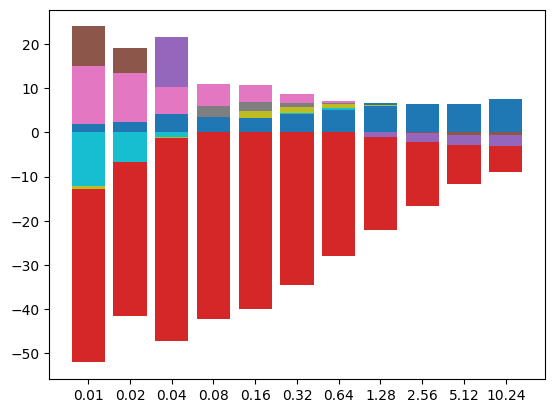

In [47]:
# Miejsce na rozwiązanie
X = create_matrix(x, 10)
lambdas = get_lambdas()

# Obliczenie wyników dla wszystkich lambda
results = {lambda_ : verify_lambda(X, y, lambda_) for lambda_ in lambdas}

# Współczynniki dla różnych lambda
coefs = [x[2] for x in results.values()]

# Wypisanie współczynników w zależności od lambda
for i in range(0, 11):
    w_i = [w[i] for w in coefs]
    plt.bar(list(map(str, lambdas)), w_i, tick_label=list(map(str, lambdas)))
plt.show()

**Wnioski**

Wzrost parametru regularyzacyjnego powoduję zmniejszanie wartości bezwględnych współczynników.

### Zadanie 3 - Metoda doboru cech modelu

Pierwszą metodą doboru cech modelu, która zostanie przetestowana jest metoda zachłanna (algorytm w przód). W każdym kroku tej metody poszukujemy cechy, która najlepiej minimalizuje nam średni błąd CV (walidacji krzyżowej), a następnie dodajemy ją do zbioru cech.   

Do tego celu wykorzystamy zbiór przedstawiający ceny mieszkań z King County (do pobrania z MSTeams).

In [48]:
# Wczytanie danych
import pandas as pd

dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)

In [51]:
# Stworzenie nowych zmiennych
from math import log, sqrt
sales['sqft_living_sqrt'] = sales['sqft_living'].apply(sqrt)
sales['sqft_lot_sqrt'] = sales['sqft_lot'].apply(sqrt)
sales['bedrooms_square'] = sales['bedrooms']*sales['bedrooms']
sales['floors_square'] = sales['floors']*sales['floors']

def add_const(X):
    X0 = np.ones((len(X), 1))
    X.insert(0, 'const', X0)

add_const(sales)

Na zbiorze treningowym, dla cech 
['bedrooms', 'bedrooms_square', 'bathrooms', 'sqft_living', 'sqft_living_sqrt', 'sqft_lot', 'sqft_lot_sqrt', 'floors', 'floors_square', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
przy pomocy walidacji krzyżowej wyznaczamy wykresy błąd modelu, który będzie miał tylko wyraz wolny, a następnie biorąc pojedynczą cechę, a następnie wszystkie podwójne, potrójne itd. cechy wyznaczamy błędy modelu. Na podstawie tych błędów wyznaczamy, które zbiory cech (1, 2, 3, ...) elementowe nalepiej minimalizują nam błąd CV. 

In [52]:
# Miejsce na kod
from sklearn.linear_model import LinearRegression
from itertools import combinations
from sklearn.model_selection import cross_val_score

n_elements = 5

features =  ['bedrooms', 'bedrooms_square', 'bathrooms', 'sqft_living', 'sqft_living_sqrt', 'sqft_lot', 'sqft_lot_sqrt', 'floors', 'floors_square', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
for n in range(n_elements  + 1):
    min_error = float('inf')
    min_features = []
    
    # Stworzenie wszystkich n-elementowych kombinacji
    tmp_features = list(combinations(features, n))
    for tmp_feature in tmp_features:
        tmp_feature = list(tmp_feature)
        tmp_feature = ['const'] + tmp_feature

        # Obliczenie średniej z błędu NRMSE
        tmp_error = np.mean(cross_val_score(LinearRegression(), sales[tmp_feature], sales['price'], cv = 3, scoring='neg_root_mean_squared_error', n_jobs=-1))

        # Zapisanie wyników tylko jeśli NRMSE jest bliżej 0
        if abs(tmp_error) < abs(min_error):
            min_error = tmp_error
            min_features = tmp_feature
        
    print('min error: {:<20} -> features: %s'.format(abs(round(min_error, 3))) % min_features)
    

min error: 367295.019           -> features: ['const']
min error: 261496.63            -> features: ['const', 'sqft_living']
min error: 250392.101           -> features: ['const', 'sqft_living', 'view']
min error: 232303.621           -> features: ['const', 'sqft_living', 'grade', 'yr_built']
min error: 221814.696           -> features: ['const', 'sqft_living', 'sqft_living_sqrt', 'grade', 'yr_built']
min error: 213510.167           -> features: ['const', 'sqft_living', 'sqft_living_sqrt', 'waterfront', 'grade', 'yr_built']


Następnie wykorzystując powyższe wyniki lub opracowując nową funkcję napisz algorytm zachłanny wyboru cech, który do nowego zbioru cech dorzucać będzie cechę, która najlepiej minimalizuje błąd naszego modelu.

In [53]:
# Miejce na kod
features =  ['bedrooms', 'bedrooms_square', 'bathrooms', 'sqft_living', 'sqft_living_sqrt', 'sqft_lot', 'sqft_lot_sqrt', 'floors', 'floors_square', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
n_features = 10
best_features = ['const']
for n in range(n_features):
    min_error = float('inf')
    min_error_features = []
    test_features = []

    # Zdefiniowanie cech, które jeszcze nie zostały użyte
    tmp_features = [f for f in features if f not in best_features]

    # Test poszczególnych cech
    for tmp_feature in tmp_features:
        test_features = list(best_features)
        test_features.append(tmp_feature)

        # Obliczenie średniej z błędu NRMSE
        test_error = np.mean(cross_val_score(LinearRegression(), sales[test_features], sales['price'], cv = 3, scoring='neg_root_mean_squared_error', n_jobs = -1))
        
        # Zapisanie wyników tylko jeśli NRMSE jest bliżej 0
        if abs(test_error) < abs(min_error):
            min_error = test_error
            min_error_features = test_features
    
    best_features = min_error_features
    print('current error: {:<25} -> features: %s'.format(abs(round(min_error, 3))) % best_features)

current error: 261496.63                 -> features: ['const', 'sqft_living']
current error: 250392.101                -> features: ['const', 'sqft_living', 'view']
current error: 240283.01                 -> features: ['const', 'sqft_living', 'view', 'grade']
current error: 225935.845                -> features: ['const', 'sqft_living', 'view', 'grade', 'yr_built']
current error: 216203.564                -> features: ['const', 'sqft_living', 'view', 'grade', 'yr_built', 'sqft_living_sqrt']
current error: 211607.812                -> features: ['const', 'sqft_living', 'view', 'grade', 'yr_built', 'sqft_living_sqrt', 'waterfront']
current error: 209496.433                -> features: ['const', 'sqft_living', 'view', 'grade', 'yr_built', 'sqft_living_sqrt', 'waterfront', 'bathrooms']
current error: 208529.501                -> features: ['const', 'sqft_living', 'view', 'grade', 'yr_built', 'sqft_living_sqrt', 'waterfront', 'bathrooms', 'sqft_lot_sqrt']
current error: 207988.776        

**Prowównaj jak powyżej otrzymane cechy dla algorytmu zachłannego różnią się od najlepszych zbiorów cech.**

**Wnioski**

Algorytm zachłanny wskazał bardzo podobne cechy do algorytmu analizacującego wszystkie zbiory cech. Niemniej jednak dla poszczególnych n-elementowanych zbiorów atrybutów algorytm analizujący wszystkie permutacje zbioru wskazał kombinacje cech dające nieznacznie lepszy wyniki błędu RMSE. Jest to zgodne z przewidywaniami teoretycznymi, ponieważ algorytm zachłanny po wybraniu danego atrybutu nie może go usunąć ze zbioru, a jedynie ograniczyć wpływ atrybutu za pomocą współczynnika. Warto jednak zwrócić uwagę na fakt, że obliczenie wszystich możliwości w przypadku tak wielkich zbiorór jak analizowany jest niemożliwe ze względu na złożoność obliczeniową.